In [25]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling
import pathlib

from omegaconf import OmegaConf

from src.utils.visualization import plot_comparison_histogram

In [27]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 500)

In [44]:
# Parse configs
cfg = OmegaConf.load('../config.yaml')

# Prepare paths
raw_data_dir = '..' / pathlib.Path(cfg.paths.data.raw)
raw_file = raw_data_dir / cfg.files.raw_dataset

## Explore the dataset

In [50]:
df = pd.read_csv(
    raw_file, 
    dtype={
        'gkz': 'str',
        'implausible': 'str',
        'pinned': 'str',
        }
    )

In [46]:
df.iloc[:, [9, 31, 33]]

,gkz,implausible,pinned
0,NaN,False,True
1,NaN,False,True
2,90001.0,False,True
3,NaN,False,True
4,NaN,False,True
...,...,...,...
502771,NaN,False,False
502772,NaN,False,True
502773,90001.0,False,True
502774,NaN,False,True


In [6]:
#pandas_profiling.ProfileReport(
#    df, minimal=True
#)

In [7]:
for col in df.columns:
    print(col, df[col].dtype)

open_uuid object
open_test_uuid object
time_utc object
cat_technology object
network_type object
lat float64
long float64
loc_src object
loc_accuracy float64
gkz float64
zip_code float64
country_location object
download_kbit float64
upload_kbit float64
ping_ms float64
lte_rsrp float64
lte_rsrq float64
server_name object
test_duration int64
num_threads float64
platform object
model object
client_version object
network_mcc_mnc object
network_name object
sim_mcc_mnc object
nat_type object
asn float64
ip_anonym object
ndt_download_kbit float64
ndt_upload_kbit float64
implausible bool
signal_strength float64
pinned bool
kg_nr float64
gkz_sa float64
land_cover float64
cell_area_code float64
cell_location_id float64
channel_number float64
radio_band float64
settlement_type float64
link_id float64
link_name object
link_distance float64
edge_id float64
link_frc float64
dtm_level float64
signal_classification float64


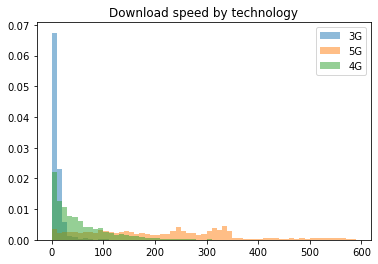

In [51]:
allowed_values = ['3G', '4G', '5G']
filter_ = df.cat_technology.isin(allowed_values)

plot_comparison_histogram(
    df[filter_].download_kbit/1e3,
    df[filter_].cat_technology,
    bins=np.arange(0, 600, 10),
    title='Download speed by technology'
)

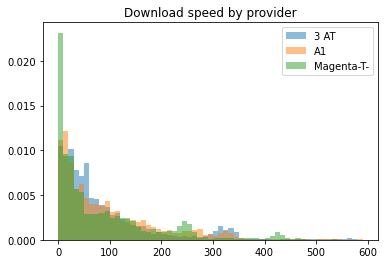

In [31]:
tmp_filter = filter_ & df.network_name.isin(['A1', '3 AT', 'Magenta-T-'])

plot_comparison_histogram(
    df[tmp_filter].download_kbit/1e3,
    df[tmp_filter].network_name,
    bins=np.arange(0, 600, 10),
    title='Download speed by provider'
)

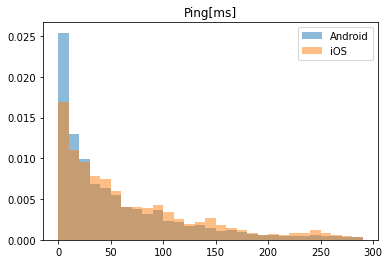

In [32]:
plot_comparison_histogram(
    df[filter_].download_kbit/1e3,
    df[filter_].platform,
    bins=np.arange(0, 300, 10),
    title='Ping[ms]'
)

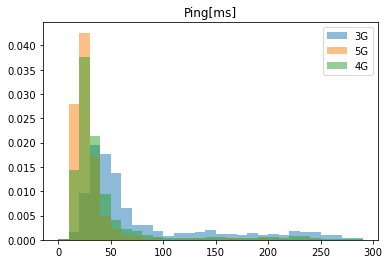

In [33]:
plot_comparison_histogram(
    df[filter_].ping_ms,
    df[filter_].cat_technology,
    bins=np.arange(0, 300, 10),
    title='Ping[ms]'
)

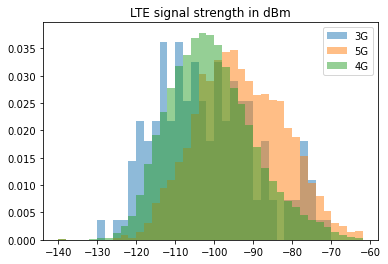

In [34]:
plot_comparison_histogram(
    df[filter_].lte_rsrp,
    df[filter_].cat_technology,
    title='LTE signal strength in dBm',
    bins=np.arange(-140, -60, 2)
)

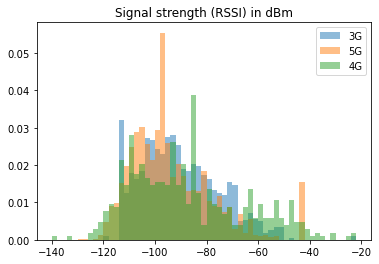

In [35]:
plot_comparison_histogram(
    df[filter_].signal_strength,
    df[filter_].cat_technology,
    title='Signal strength (RSSI) in dBm',
    bins=np.arange(-140, -20, 2)
)

<AxesSubplot:title={'center':'Time of day'}>

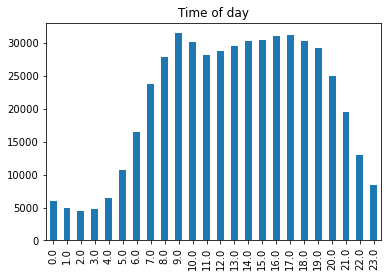

In [39]:
df.time_utc = pd.to_datetime(df.time_utc, errors='coerce')
df['time_hour'] = df.time_utc.dt.hour

df.time_hour.value_counts() \
    .sort_index() \
        .plot(kind='bar', title='Time of day')

In [37]:
df.columns

Index(['open_uuid', 'open_test_uuid', 'time_utc', 'cat_technology',
       'network_type', 'lat', 'long', 'loc_src', 'loc_accuracy', 'gkz',
       'zip_code', 'country_location', 'download_kbit', 'upload_kbit',
       'ping_ms', 'lte_rsrp', 'lte_rsrq', 'server_name', 'test_duration',
       'num_threads', 'platform', 'model', 'client_version', 'network_mcc_mnc',
       'network_name', 'sim_mcc_mnc', 'nat_type', 'asn', 'ip_anonym',
       'ndt_download_kbit', 'ndt_upload_kbit', 'implausible',
       'signal_strength', 'pinned', 'kg_nr', 'gkz_sa', 'land_cover',
       'cell_area_code', 'cell_location_id', 'channel_number', 'radio_band',
       'settlement_type', 'link_id', 'link_name', 'link_distance', 'edge_id',
       'link_frc', 'dtm_level', 'signal_classification'],
      dtype='object')

In [38]:
df.time_utc

0         2022-01-20 00:00:03
1         2022-01-20 00:00:19
2         2022-01-20 00:00:56
3         2022-01-20 00:00:56
4         2022-01-20 00:01:20
                 ...         
502771    2022-02-20 14:55:19
502772    2022-02-20 14:55:22
502773    2022-02-20 14:55:26
502774    2022-02-20 14:55:33
502775    2022-02-20 14:55:40
Name: time_utc, Length: 502776, dtype: object

In [15]:
df['daytime_category'] = pd.cut(df.time_hour,range(0,25, 6))

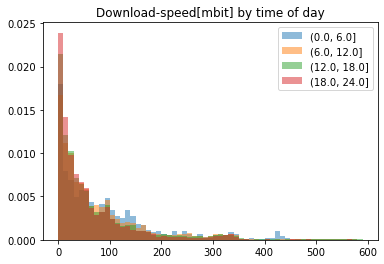

In [16]:
plot_comparison_histogram(
    df[filter_].download_kbit/1e3,
    df[filter_].daytime_category,
    bins=np.arange(0, 600, 10),
    title='Download-speed[mbit] by time of day'
)

<AxesSubplot:xlabel='daytime_category'>

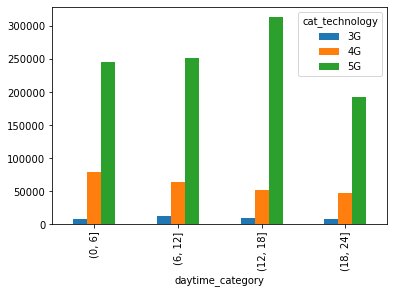

In [17]:
df[filter_] \
    .groupby(['cat_technology', 'daytime_category']) \
        ['download_kbit'].mean().unstack().transpose() \
            .plot(kind='bar')

In [18]:
df.platform.value_counts()

Android    133970
iOS         53842
Name: platform, dtype: int64

In [19]:
df[filter_].daytime_category.value_counts()

(12, 18]    12341
(6, 12]     12236
(18, 24]     5510
(0, 6]       2699
Name: daytime_category, dtype: int64

In [58]:
import pandas as pd

df = pd.read_csv('../data/processed/netztest-opendata-processed.csv')

In [59]:
df

,lat,long,download_kbit,upload_kbit,ping_ms,lte_rsrp,signal_strength,hour,platform,network_name,hour_cat,cat_technology
0,51.011007,13.816167,149734.0,10482.0,39.1,NaN,NaN,0.0,iOS,NaN,NaN,4G
1,47.416610,9.740681,249290.0,19049.0,30.3,NaN,NaN,0.0,iOS,NaN,NaN,5G
2,47.416661,9.740784,244549.0,20649.0,30.2,NaN,NaN,0.0,iOS,NaN,NaN,5G
3,47.416701,9.740706,245385.0,30315.0,30.0,NaN,NaN,0.0,iOS,NaN,NaN,5G
4,47.416688,9.740663,242417.0,26894.0,30.1,NaN,NaN,0.0,iOS,NaN,NaN,5G
...,...,...,...,...,...,...,...,...,...,...,...,...
11167,47.786750,12.956764,89899.0,8185.0,39.7,NaN,NaN,14.0,iOS,NaN,"(12, 18]",4G
11168,48.246179,13.814193,18041.0,19223.0,47.2,NaN,NaN,14.0,iOS,NaN,"(12, 18]",4G
11169,NaN,NaN,96338.0,16785.0,21.4,NaN,NaN,14.0,iOS,NaN,"(12, 18]",4G
11170,48.687179,13.870744,104993.0,30005.0,23.0,NaN,NaN,14.0,iOS,NaN,"(12, 18]",4G


In [55]:
from src.prepare_dataset import get_filters
# Parse configs
cfg = OmegaConf.load('../config.yaml')


get_filters(df, cfg).value_counts()

False    491604
True      11172
dtype: int64